In [1]:
# The code was removed by Watson Studio for sharing.

,activity_date,facility_address,facility_city,facility_id,facility_name,Unnamed: 5,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,score,facility_zip
0,5/9/17,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,NaN,A,OW0181955,JOHN'S FAMOUS MEAT & DELI INC.,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612.0,HOVIK'S FAMOUS MEAT & DELI,ACTIVE,98.0,91344.0
1,4/10/17,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,NaN,A,OW0237843,"SCO, LLC",RESTAURANT (61-150) SEATS HIGH RISK,1638.0,SHAKEY'S PIZZA,ACTIVE,94.0,90505.0
2,4/4/17,17515 CHATSWORTH ST,GRANADA HILLS,FA0007801,BAITH AL HALAL,NaN,A,OW0031150,SABIR MOHAMMAD SHAHID,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612.0,BAITH AL HALAL,INACTIVE,95.0,91344.0
3,8/15/17,44455 VALLEY CENTRAL WAY,LANCASTER,FA0013858,FOOD 4 LESS #306,NaN,A,OW0012108,"FOOD 4 LESS, INC.",RESTAURANT (0-30) SEATS HIGH RISK,1632.0,FOOD 4 LESS DELI/BAKERY#306,ACTIVE,98.0,93536.0
4,9/26/16,11700 SOUTH ST,ARTESIA,FA0179671,PHO LITTLE SAIGON,NaN,A,OW0185167,PHO SOUTH ST INC,RESTAURANT (61-150) SEATS HIGH RISK,1638.0,PHO LITTLE SAIGON,ACTIVE,96.0,90701.0


In [2]:
#convert date time object
df['activity_date'] = pd.to_datetime(df['activity_date'])
df.head()

,activity_date,facility_address,facility_city,facility_id,facility_name,Unnamed: 5,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,score,facility_zip
0,2017-05-09,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,NaN,A,OW0181955,JOHN'S FAMOUS MEAT & DELI INC.,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612.0,HOVIK'S FAMOUS MEAT & DELI,ACTIVE,98.0,91344.0
1,2017-04-10,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,NaN,A,OW0237843,"SCO, LLC",RESTAURANT (61-150) SEATS HIGH RISK,1638.0,SHAKEY'S PIZZA,ACTIVE,94.0,90505.0
2,2017-04-04,17515 CHATSWORTH ST,GRANADA HILLS,FA0007801,BAITH AL HALAL,NaN,A,OW0031150,SABIR MOHAMMAD SHAHID,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612.0,BAITH AL HALAL,INACTIVE,95.0,91344.0
3,2017-08-15,44455 VALLEY CENTRAL WAY,LANCASTER,FA0013858,FOOD 4 LESS #306,NaN,A,OW0012108,"FOOD 4 LESS, INC.",RESTAURANT (0-30) SEATS HIGH RISK,1632.0,FOOD 4 LESS DELI/BAKERY#306,ACTIVE,98.0,93536.0
4,2016-09-26,11700 SOUTH ST,ARTESIA,FA0179671,PHO LITTLE SAIGON,NaN,A,OW0185167,PHO SOUTH ST INC,RESTAURANT (61-150) SEATS HIGH RISK,1638.0,PHO LITTLE SAIGON,ACTIVE,96.0,90701.0


In [3]:
# data visualization and preprocessing
df['program_status'].value_counts()

ACTIVE      169449
INACTIVE     21891
Name: program_status, dtype: int64

In [4]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0         --> 2020.1.1-0        anaconda
    certifi:         2020.4.5.1-py36_0  --> 2020.4.5.1-py36_0 anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

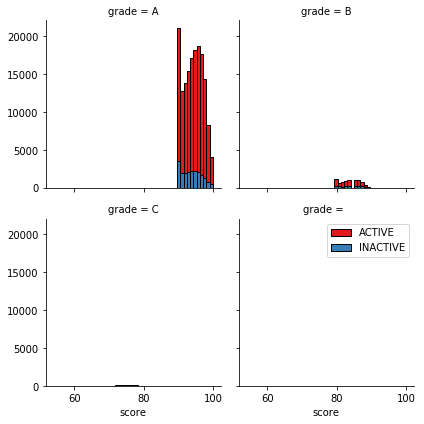

In [5]:
import seaborn as sns

bins = np.linspace(df.score.min(), df.score.max())
g = sns.FacetGrid(df, col="grade", hue="program_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'score', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [6]:
df.groupby(['grade'])['program_status'].value_counts(normalize=True)

grade  program_status
       ACTIVE            0.740741
       INACTIVE          0.259259
A      ACTIVE            0.889629
       INACTIVE          0.110371
B      ACTIVE            0.814159
       INACTIVE          0.185841
C      ACTIVE            0.800587
       INACTIVE          0.199413
Name: program_status, dtype: float64

In [7]:
df.groupby(['grade'])['facility_city'].value_counts(normalize=True)

grade  facility_city      
       LOS ANGELES            0.333333
       CARSON                 0.185185
       CERRITOS               0.074074
       WEST COVINA            0.074074
       ALHAMBRA               0.037037
       ARCADIA                0.037037
       GARDENA                0.037037
       MONTEREY PARK          0.037037
       RESEDA                 0.037037
       ROWLAND HEIGHTS        0.037037
       SIGNAL HILL            0.037037
       STEVENSON RANCH        0.037037
       WHITTIER               0.037037
A      LOS ANGELES            0.275771
       GLENDALE               0.023713
       TORRANCE               0.021782
       BURBANK                0.019630
       SANTA MONICA           0.019089
       NORTH HOLLYWOOD        0.017329
       VAN NUYS               0.016298
       WHITTIER               0.014659
       POMONA                 0.013931
       INGLEWOOD              0.012243
       LANCASTER              0.012193
       DOWNEY                 0.01178

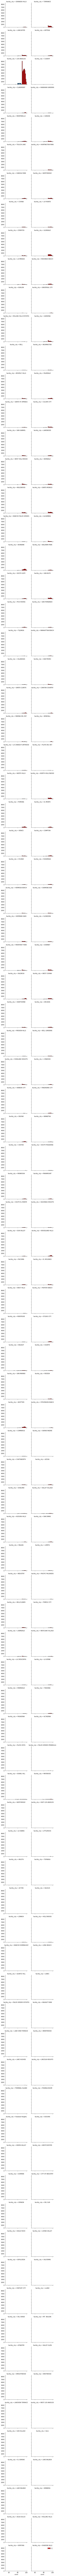

In [8]:
import seaborn as sns

bins = np.linspace(df.score.min(), df.score.max())
g = sns.FacetGrid(df, col="facility_city", hue="grade", palette="Set1", col_wrap=2)
g.map(plt.hist, 'score', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

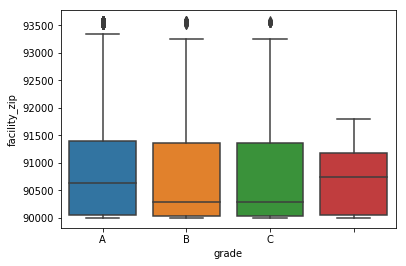

In [9]:
sns.boxplot(x="grade", y="facility_zip", data=df)

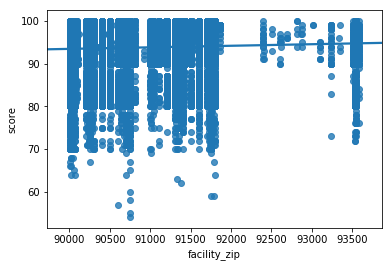

In [16]:
sns.regplot(x="facility_zip", y="score", data=df, ci=None)

In [10]:
# As we can see above, most restaurants with active status are in LOS ANGELES, so I will focus on data in LOS ANGELES.

In [11]:
data = df[df['facility_city'] == "LOS ANGELES"]
data.head()

,activity_date,facility_address,facility_city,facility_id,facility_name,Unnamed: 5,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,score,facility_zip
5,2016-05-11,1309 S HOOVER ST,LOS ANGELES,FA0179745,HAPPY TACOS TO GO,NaN,A,OW0185239,MAT L. MORA,RESTAURANT (0-30) SEATS HIGH RISK,1632.0,HAPPY TACOS TO GO,INACTIVE,96.0,90006.0
7,2016-11-03,524 S MAIN ST,LOS ANGELES,FA0051633,THE NICKEL DINER,NaN,A,OW0004308,"BELLE DU JOUR, INC",RESTAURANT (31-60) SEATS HIGH RISK,1635.0,THE NICKEL DINER,ACTIVE,96.0,90013.0
10,2016-08-30,1151 W VENICE BLVD,LOS ANGELES,FA0031441,SABOR MEXICANO RESTAURANT,NaN,B,OW0036248,"TORRES, CATALINA",RESTAURANT (0-30) SEATS HIGH RISK,1632.0,SABOR MEXICANO RESTAURANT,ACTIVE,86.0,90015.0
14,2017-07-13,110 E 9TH ST BL034,LOS ANGELES,FA0052584,TRIMANA OF CALIFORNIAMART,NaN,A,OW0018415,"KANG, YOUNG H",RESTAURANT (0-30) SEATS HIGH RISK,1632.0,TRIMANA OF CALIFORNIAMART,ACTIVE,93.0,90079.0
21,2016-02-02,8000 W SUNSET BLVD,LOS ANGELES,FA0035048,AMC DINE-IN SUNSET 5,NaN,A,OW0034300,"SUNDANCE CINEMAS, LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,AMC DINE-IN SUNSET 5,ACTIVE,90.0,90046.0


In [12]:
df2=data[['facility_zip','program_status','score','grade']].head()
df2=pd.concat([df2,pd.get_dummies(df['program_status'])],axis=1)
df2=pd.concat([df2,pd.get_dummies(df['grade'])], axis=1)
df2["facility_zip"] = pd.to_numeric(df["facility_zip"])
df2.head()

,facility_zip,program_status,score,grade,ACTIVE,INACTIVE,,A,B,C
0,91344.0,NaN,NaN,NaN,1,0,0,1,0,0
1,90505.0,NaN,NaN,NaN,1,0,0,1,0,0
2,91344.0,NaN,NaN,NaN,0,1,0,1,0,0
3,93536.0,NaN,NaN,NaN,1,0,0,1,0,0
4,90701.0,NaN,NaN,NaN,1,0,0,1,0,0


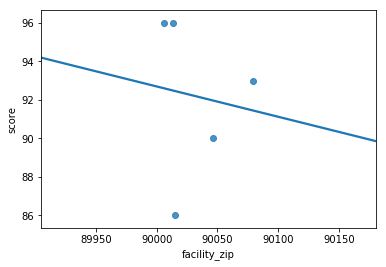

In [13]:
sns.regplot(x="facility_zip", y="score", data=df2, ci=None)

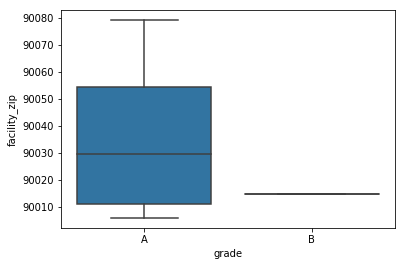

In [14]:
sns.boxplot(x="grade", y="facility_zip", data=df2)

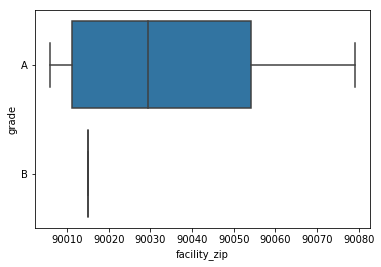